partie a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

nous avons utilisé le code suivant pour trouver le résultat de la partie a (on a 12 Expériences 'certaines combinaisons de taux d’apprentissage et de tailles de mini-batch' )


La précision obtenue =  95.77017095043686

Pour un lr =  0.001

Avec une taille de mini-batch =  1


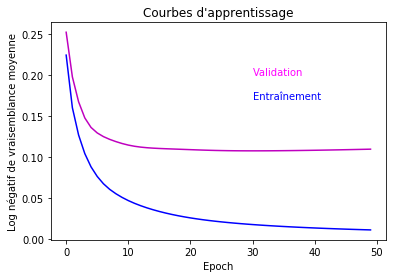

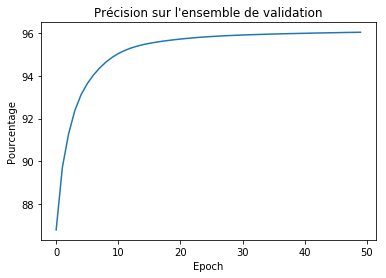

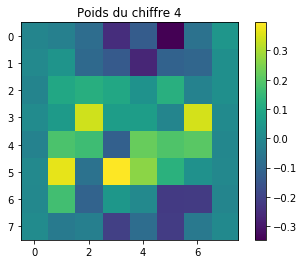

In [9]:
digits = datasets.load_digits()

X = digits.data

y = digits.target

y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1  # one hot target or shape Nx


X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))  # Weights of shape KxL

best_W = None

best_accuracy = 0

lr = 0.001    #taux d’apprentissage [0.001 , 0,01 , 0.1]
nb_epochs = 50
#minibatch_size = len(y) // 20

minibatch_size = 1      # [1, 20 , 200 , 1000]

losses_train = []
losses_validation = []
accuracies = []

def softmax(x):
    # assurez-vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    
    
    return np.exp(x - max(x)) / np.sum(np.exp(x - max(x)))


def get_accuracy(X, y, W):
    sum = 0
    for vi in range(0, len(X)):
        y_pred = softmax(np.dot(W, X[vi]))
        sum = sum + np.vdot(y[vi], y_pred)
    return sum / len(X) * 100                 


def get_grads(y, y_pred, X):
    return np.outer(y, X) - np.outer(y_pred, X)


def get_loss(y, y_pred):
#    return (np.sum(y*np.log(y_pred)))
    return (np.vdot(np.log(y_pred),y))

def shuffle_arrays(X, y):
    np.random.shuffle(np.arange(X.shape[0]))
    X = X[np.arange(X.shape[0])]
    y = y[np.arange(X.shape[0])]
    return X, y



for epoch in range(nb_epochs):
    loss_train = 0
    loss_validation = 0
    accuracy = 0
    for i in range(0, X_train.shape[0], minibatch_size):
        if X_train.shape[0] - i < minibatch_size:
            break
        g = 0
        for mb in range(i, minibatch_size + i):
            xi = np.append(X_train[mb], [1])
            theta = np.append(W, np.ones((10, 1)), axis=1)
            y_pred = softmax(np.dot(theta, xi))
            g = g - get_grads(y_train[mb], y_pred, X_train[mb])
        g = g / minibatch_size
        W = W - lr * g
    X_train, y_train = shuffle_arrays(X_train, y_train)
    
    
    #*******calculer la perte (loss) sur l'ensemble d'Entraînement*********
    for i in range(0, X_train.shape[0]):
        y_pred = softmax(np.dot(W, X_train[i]))
        loss_train = loss_train - get_loss(y_train[i], y_pred)
    loss_train = loss_train / X_train.shape[0]
    losses_train.append(loss_train)
    
    
    #*******calculer la précision (accuracy) sur l'ensemble de validation*********
    accuracy = get_accuracy(X_validation, y_validation, W)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        
        #sélectionner les meilleurs paramètres 
        best_accuracy = accuracy
        best_W = W
    for i in range(0, X_validation.shape[0]):
        y_pred = softmax(np.dot(W, X_validation[i]))
        loss_validation = loss_validation - get_loss(y_validation[i], y_pred)
    loss_validation = loss_validation / X_validation.shape[0]
    losses_validation.append(loss_validation)

#*************************************************************************************************************
accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
print('\nLa précision obtenue = ', accuracy_on_unseen_data)  # 0.897506925208
print('\nPour un lr = ', lr)
print('\nAvec une taille de mini-batch = ', minibatch_size)


#**************************
plt.figure(1) 
plt.plot(losses_train, 'b', losses_validation, 'm')
plt.text(30, .17, 'Entraînement', color='blue')
plt.text(30, .2, 'Validation', color='magenta')
plt.title('Courbes d\'apprentissage')
plt.ylabel('Log négatif de vraisemblance moyenne')
plt.xlabel('Epoch')

#**************************
plt.figure(2)
plt.plot(accuracies)
plt.title('Précision sur l\'ensemble de validation')
plt.ylabel('Pourcentage')
plt.xlabel('Epoch')

#**************************
plt.figure(3)
plt.imshow(best_W[4, :].reshape(8, 8))
plt.title('Poids du chiffre 4')
plt.colorbar()
plt.show()



Partie b

nous avons utilisé le code suivant pour trouver les coefficients de fonction de perte (landa1 et landa2) optimal obtenus avec certaines combinaisons de taux d’apprentissage et de tailles de mini-batch lors de l’exécution d’un code répliquant une descente stochastique de gradients par mini-batches avec la fonction de régression logistique.

In [28]:
X = digits.data
x_uni= np.random.uniform(np.min(X), np.max(X), (1797,8))

X=np.hstack((X,x_uni))

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y = digits.target

y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1  # one hot target or shape Nx
W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))  # Weights of shape KxL




best_landa1= 0
best_landa2= 0

best_W = None
best_accuracy = 0
lr = 0.001
nb_epochs = 50
#minibatch_size = len(y) // 20
minibatch_size = 20

losses_train = []
losses_validation = []
accuracies = []

def softmax(x):
    # assurez-vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    return np.exp(x - max(x)) / np.sum(np.exp(x - max(x)))


def get_accuracy(X, y, W):
    sum = 0
    for vi in range(0, len(X)):
        y_pred = softmax(np.dot(W, X[vi]))
        sum = sum + np.vdot(y[vi], y_pred)
    return sum / len(X) * 100  


def get_grads(y, y_pred, X):
    return np.outer(y, X) - np.outer(y_pred, X)+2*landa1*np.abs(np.linalg.norm(W))+landa2*np.sign(W)


def get_loss(y, y_pred):
    return ((np.vdot(np.log(y_pred),y))+landa1*(np.linalg.norm(W)**2)+landa2*np.linalg.norm(W))

def shuffle_arrays(X, y):
    np.random.shuffle(np.arange(X.shape[0]))
    X = X[np.arange(X.shape[0])]
    y = y[np.arange(X.shape[0])]
    return X, y


for a in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:       #landa 1 [0 1]
    for b in [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:  #landa 2 [0 1]
        for epoch in range(nb_epochs):
            landa1=a
            landa2=b
            loss_train = 0
            loss_validation = 0
            accuracy = 0
            for i in range(0, X_train.shape[0], minibatch_size):
                if X_train.shape[0] - i < minibatch_size:
                    break
                g = 0
                for mb in range(i, minibatch_size + i):
                    xi = np.append(X_train[mb], [1])
                    theta = np.append(W, np.ones((10, 1)), axis=1)
                    y_pred = softmax(np.dot(theta, xi))
                    g = g - get_grads(y_train[mb], y_pred, X_train[mb])
                g = g / minibatch_size
                W = W - lr * g
            X_train, y_train = shuffle_arrays(X_train, y_train)
            #*******calculer la perte (loss) sur l'ensemble d'Entraînement*********
            for i in range(0, X_train.shape[0]):
                y_pred = softmax(np.dot(W, X_train[i]))
                loss_train = loss_train - get_loss(y_train[i], y_pred)
            loss_train = loss_train / X_train.shape[0]
            losses_train.append(loss_train)
            #*******calculer la précision (accuracy) sur l'ensemble de validation*********
            accuracy = get_accuracy(X_validation, y_validation, W)
            accuracies.append(accuracy)
            if accuracy > best_accuracy:
                #sélectionner les meilleurs paramètres 
                best_accuracy = accuracy
                best_W = W
                best_landa1= a
                best_landa2= b
            for i in range(0, X_validation.shape[0]):
                y_pred = softmax(np.dot(W, X_validation[i]))
                loss_validation = loss_validation - get_loss(y_validation[i], y_pred)
            loss_validation = loss_validation / X_validation.shape[0]
            losses_validation.append(loss_validation)
# ************************************************************************************
accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
print('\nLa précision obtenue = ', accuracy_on_unseen_data)  # 0.897506925208
print('\nPour un lr = ', lr)
print('\nAvec une taille de mini-batch = ', minibatch_size)        
print('\nbest landa1 = ', best_landa1)
print('\nbest landa2 = ', best_landa2)







C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sign



La précision obtenue =  93.4810943248287

Pour un lr =  0.001

Avec une taille de mini-batch =  20

best landa1 =  0.1

best landa2 =  0.2


nous avons utilisé le code suivant pour trouver la moyenne et la variance des poids de modèle associés à ces dimensions contenant des valeurs aléatoires par rapport à la moyenne et la variance des poids associés aux dimensions contenant des vraies données.
ou on a remplacé les valeurs  des coefficients de fonction de perte (landa1 et landa2)  optimals trouver dans la question précédente pour chaque Expériences

In [52]:
w1m8=[]  # la moyenne des poids de modèle associés à ces dimensions contenant des valeurs aléatoires
w1v8=[]  # la variance des poids de modèle associés à ces dimensions contenant des valeurs aléatoires

w1m64=[] #la moyenne des poids associés aux dimensions contenant des vraies données
w1v64=[] #la variance des poids associés aux dimensions contenant des vraies données

In [ ]:
for epoch in range(nb_epochs):
    loss_train = 0
    loss_validation = 0
    accuracy = 0
    for i in range(0, X_train.shape[0], minibatch_size):
        if X_train.shape[0] - i < minibatch_size:
            break
        g = 0
        for mb in range(i, minibatch_size + i):
            xi = np.append(X_train[mb], [1])
            theta = np.append(W, np.ones((10, 1)), axis=1)
            y_pred = softmax(np.dot(theta, xi))
            g = g - get_grads(y_train[mb], y_pred, X_train[mb])
        g = g / minibatch_size
        W = W - lr * g
    X_train, y_train = shuffle_arrays(X_train, y_train)
    
    
    #*******calculer la perte (loss) sur l'ensemble d'Entraînement*********
    for i in range(0, X_train.shape[0]):
        y_pred = softmax(np.dot(W, X_train[i]))
        loss_train = loss_train - get_loss(y_train[i], y_pred)
    loss_train = loss_train / X_train.shape[0]
    losses_train.append(loss_train)
    
    
    #*******calculer la précision (accuracy) sur l'ensemble de validation*********
    accuracy = get_accuracy(X_validation, y_validation, W)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        
        #sélectionner les meilleurs paramètres 
        best_accuracy = accuracy
        best_W = W
    for i in range(0, X_validation.shape[0]):
        y_pred = softmax(np.dot(W, X_validation[i]))
        loss_validation = loss_validation - get_loss(y_validation[i], y_pred)
    loss_validation = loss_validation / X_validation.shape[0]
    losses_validation.append(loss_validation)

    

            for i in range(0, X_train.shape[0], minibatch_size):
                if X_train.shape[0] - i < minibatch_size:
                    break
                g = 0
                for mb in range(i, minibatch_size + i):
                    xi = np.append(X_train[mb], [1])
                    theta = np.append(W, np.ones((10, 1)), axis=1)
                    y_pred = softmax(np.dot(theta, xi))
                    g = g - get_grads(y_train[mb], y_pred, X_train[mb])
                g = g / minibatch_size
                W = W - lr * g
            X_train, y_train = shuffle_arrays(X_train, y_train)


            #*******calculer la perte (loss) sur l'ensemble d'Entraînement*********
            for i in range(0, X_train.shape[0]):
                y_pred = softmax(np.dot(W, X_train[i]))
                loss_train = loss_train - get_loss(y_train[i], y_pred)
            loss_train = loss_train / X_train.shape[0]
            losses_train.append(loss_train)


            #*******calculer la précision (accuracy) sur l'ensemble de validation*********
            accuracy = get_accuracy(X_validation, y_validation, W)
            accuracies.append(accuracy)
            if accuracy > best_accuracy:

                #sélectionner les meilleurs paramètres 
                best_accuracy = accuracy
                best_W = W
            for i in range(0, X_validation.shape[0]):
                y_pred = softmax(np.dot(W, X_validation[i]))
                loss_validation = loss_validation - get_loss(y_validation[i], y_pred)
            loss_validation = loss_validation / X_validation.shape[0]
            losses_validation.append(loss_validation)

        #*************************************************************************************************************
        accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
        print('\nLa précision obtenue = ', accuracy_on_unseen_data)  # 0.897506925208
        print('\nPour un lr = ', lr)
        print('\nAvec une taille de mini-batch = ', minibatch_size)


        #**************************
        plt.figure(1) 
        plt.plot(losses_train, 'b', losses_validation, 'm')
        plt.text(30, .17, 'Entraînement', color='blue')
        plt.text(30, .2, 'Validation', color='magenta')
        plt.title('Courbes d\'apprentissage')
        plt.ylabel('Log négatif de vraisemblance moyenne')
        plt.xlabel('Epoch')

        #**************************
        plt.figure(2)
        plt.plot(accuracies)
        plt.title('Précision sur l\'ensemble de validation')
        plt.ylabel('Pourcentage')
        plt.xlabel('Epoch')

        #**************************



        w1m8.append(np.mean(best_W[:,64:]))
        w1v8.append(np.var(best_W[:,64:]))

        w1m64.append(np.mean(best_W[:,:64]))
        w1v64.append(np.var(best_W[:,:64]))


La précision obtenue =  93.35084161475558

Pour un lr =  0.1

Avec une taille de mini-batch =  1000


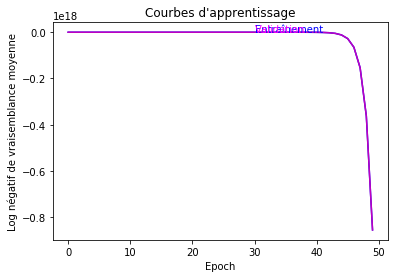

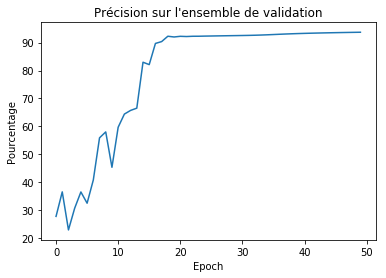

In [61]:
X = digits.data
x_uni= np.random.uniform(np.min(X), np.max(X), (1797,8))

X=np.hstack((X,x_uni))

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y = digits.target

y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1  # one hot target or shape Nx
W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))  # Weights of shape KxL




landa1= 0.1  #[nous avons affecté les valeurs de landa1 optimal pour chaque Expériences  ]
landa2= 0.2  #[nous avons affecté les valeurs de landa2 optimal pour chaque Expériences  ]
best_W = None

best_accuracy = 0

lr = 0.1    #taux d’apprentissage [0.001 , 0,01 , 0.1]
nb_epochs = 50
#minibatch_size = len(y) // 20

minibatch_size = 1000      # [1, 20 , 200 , 1000]

losses_train = []
losses_validation = []
accuracies = []

def softmax(x):
    # assurez-vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    
    
    return np.exp(x - max(x)) / np.sum(np.exp(x - max(x)))


def get_accuracy(X, y, W):
    sum = 0
    for vi in range(0, len(X)):
        y_pred = softmax(np.dot(W, X[vi]))
        sum = sum + np.vdot(y[vi], y_pred)
    return sum / len(X) * 100                 


def get_grads(y, y_pred, X):
    return np.outer(y, X) - np.outer(y_pred, X)+2*landa1*np.abs(np.linalg.norm(W))+landa2*np.sign(W)


def get_loss(y, y_pred):
    return ((np.vdot(np.log(y_pred),y))+landa1*(np.linalg.norm(W)**2)+landa2*np.linalg.norm(W))


def shuffle_arrays(X, y):
    np.random.shuffle(np.arange(X.shape[0]))
    X = X[np.arange(X.shape[0])]
    y = y[np.arange(X.shape[0])]
    return X, y


for epoch in range(nb_epochs):
    loss_train = 0
    loss_validation = 0
    accuracy = 0
    for i in range(0, X_train.shape[0], minibatch_size):
        if X_train.shape[0] - i < minibatch_size:
            break
        g = 0
        for mb in range(i, minibatch_size + i):
            xi = np.append(X_train[mb], [1])
            theta = np.append(W, np.ones((10, 1)), axis=1)
            y_pred = softmax(np.dot(theta, xi))
            g = g - get_grads(y_train[mb], y_pred, X_train[mb])
        g = g / minibatch_size
        W = W - lr * g
    X_train, y_train = shuffle_arrays(X_train, y_train)
    
    
    #*******calculer la perte (loss) sur l'ensemble d'Entraînement*********
    for i in range(0, X_train.shape[0]):
        y_pred = softmax(np.dot(W, X_train[i]))
        loss_train = loss_train - get_loss(y_train[i], y_pred)
    loss_train = loss_train / X_train.shape[0]
    losses_train.append(loss_train)
    
    
    #*******calculer la précision (accuracy) sur l'ensemble de validation*********
    accuracy = get_accuracy(X_validation, y_validation, W)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        
        #sélectionner les meilleurs paramètres 
        best_accuracy = accuracy
        best_W = W
    for i in range(0, X_validation.shape[0]):
        y_pred = softmax(np.dot(W, X_validation[i]))
        loss_validation = loss_validation - get_loss(y_validation[i], y_pred)
    loss_validation = loss_validation / X_validation.shape[0]
    losses_validation.append(loss_validation)

#*************************************************************************************************************
accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
print('\nLa précision obtenue = ', accuracy_on_unseen_data)  # 0.897506925208
print('\nPour un lr = ', lr)
print('\nAvec une taille de mini-batch = ', minibatch_size)

#**************************
plt.figure(1) 
plt.plot(losses_train, 'b', losses_validation, 'm')
plt.text(30, .17, 'Entraînement', color='blue')
plt.text(30, .2, 'Validation', color='magenta')
plt.title('Courbes d\'apprentissage')
plt.ylabel('Log négatif de vraisemblance moyenne')
plt.xlabel('Epoch')

#**************************
plt.figure(2)
plt.plot(accuracies)
plt.title('Précision sur l\'ensemble de validation')
plt.ylabel('Pourcentage')
plt.xlabel('Epoch')

#**************************



w1m8.append(np.mean(best_W[:,64:]))
w1v8.append(np.var(best_W[:,64:]))

w1m64.append(np.mean(best_W[:,:64]))
w1v64.append(np.var(best_W[:,:64]))

La moyenne et la variance des poids de modèle associés à ces dimensions contenant des valeurs aléatoires par rapport à la moyenne et la variance des poids associés aux dimensions contenant des vraies données

In [94]:


lr_min2=['exp1','exp2','2exp3','exp4','exp5','exp6','exp7','exp8','exp8']

Text(0.5,0,'Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')

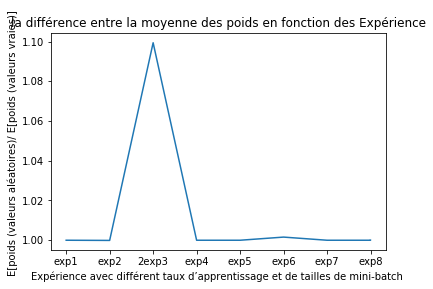

In [99]:
#la moyenne
p1=[]
for i in range(9):
    p1.append((w1m8[i]/w1m64[i]))
plt.plot(lr_min2,p1)
plt.title('la différence entre la moyenne des poids en fonction des Expérience' )
plt.ylabel('E[poids (valeurs aléatoires)/ E[poids (valeurs vraies)] ') 
plt.xlabel('Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')


Text(0.5,0,'Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')

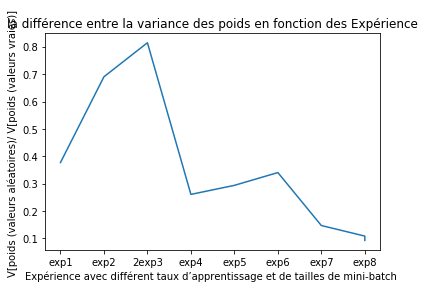

In [100]:
#la variance 
p=[]
for i in range(9):
    p.append((w1v8[i]/w1v64[i]))
plt.plot(lr_min2,p)
plt.title('la différence entre la variance des poids en fonction des Expérience' )
plt.ylabel('V[poids (valeurs aléatoires)/ V[poids (valeurs vraies)] ') 
plt.xlabel('Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')


Moyennes et variances d’un modèle appris sans régularisation

In [130]:
W_Mvr2=[]
W_Vvr2=[]


La précision obtenue =  91.6405658279213

Pour un lr =  0.001

Avec une taille de mini-batch =  20

La précision obtenue =  91.81181965645267

Pour un lr =  0.001

Avec une taille de mini-batch =  200

La précision obtenue =  91.81181965645267

Pour un lr =  0.001

Avec une taille de mini-batch =  1000

La précision obtenue =  95.29229801375095

Pour un lr =  0.01

Avec une taille de mini-batch =  20

La précision obtenue =  95.31707376510124

Pour un lr =  0.01

Avec une taille de mini-batch =  200

La précision obtenue =  95.31707376510124

Pour un lr =  0.01

Avec une taille de mini-batch =  1000

La précision obtenue =  94.0446447335794

Pour un lr =  0.1

Avec une taille de mini-batch =  20

La précision obtenue =  94.0446447335794

Pour un lr =  0.1

Avec une taille de mini-batch =  200

La précision obtenue =  94.0446447335794

Pour un lr =  0.1

Avec une taille de mini-batch =  1000


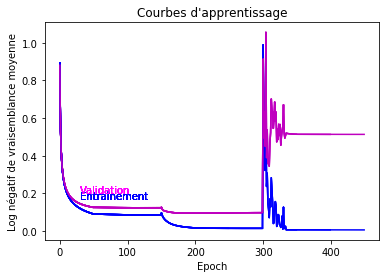

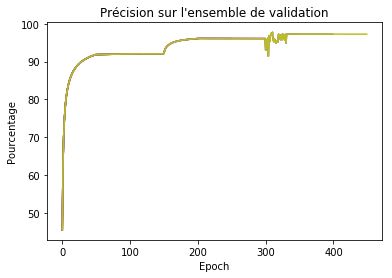

In [131]:
X = digits.data
x_uni= np.random.uniform(np.min(X), np.max(X), (1797,8))

X=np.hstack((X,x_uni))

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y = digits.target

y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1  # one hot target or shape Nx
W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))  # Weights of shape KxL


best_W = None

best_accuracy = 0

#lr = 0.1    #taux d’apprentissage [0.001 , 0,01 , 0.1]
nb_epochs = 50
#minibatch_size = len(y) // 20

#minibatch_size = 1000   # [1, 20 , 200 , 1000]

losses_train = []
losses_validation = []
accuracies = []

def softmax(x):
    # assurez-vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    
    
    return np.exp(x - max(x)) / np.sum(np.exp(x - max(x)))


def get_accuracy(X, y, W):
    sum = 0
    for vi in range(0, len(X)):
        y_pred = softmax(np.dot(W, X[vi]))
        sum = sum + np.vdot(y[vi], y_pred)
    return sum / len(X) * 100                 


def get_grads(y, y_pred, X):
    return np.outer(y, X) - np.outer(y_pred, X)


def get_loss(y, y_pred):
#    return (np.sum(y*np.log(y_pred)))
    return (np.vdot(np.log(y_pred),y))

def shuffle_arrays(X, y):
    np.random.shuffle(np.arange(X.shape[0]))
    X = X[np.arange(X.shape[0])]
    y = y[np.arange(X.shape[0])]
    return X, y

for lr  in [0.001, 0.01, 0.1]:
    for minibatch_size in [20, 200, 1000]:

        for epoch in range(nb_epochs):
            loss_train = 0
            loss_validation = 0
            accuracy = 0
            for i in range(0, X_train.shape[0], minibatch_size):
                if X_train.shape[0] - i < minibatch_size:
                    break
                g = 0
                for mb in range(i, minibatch_size + i):
                    xi = np.append(X_train[mb], [1])
                    theta = np.append(W, np.ones((10, 1)), axis=1)
                    y_pred = softmax(np.dot(theta, xi))
                    g = g - get_grads(y_train[mb], y_pred, X_train[mb])
                g = g / minibatch_size
                W = W - lr * g
            X_train, y_train = shuffle_arrays(X_train, y_train)


            #*******calculer la perte (loss) sur l'ensemble d'Entraînement*********
            for i in range(0, X_train.shape[0]):
                y_pred = softmax(np.dot(W, X_train[i]))
                loss_train = loss_train - get_loss(y_train[i], y_pred)
            loss_train = loss_train / X_train.shape[0]
            losses_train.append(loss_train)


            #*******calculer la précision (accuracy) sur l'ensemble de validation*********
            accuracy = get_accuracy(X_validation, y_validation, W)
            accuracies.append(accuracy)
            if accuracy > best_accuracy:

                #sélectionner les meilleurs paramètres 
                best_accuracy = accuracy
                best_W = W
            for i in range(0, X_validation.shape[0]):
                y_pred = softmax(np.dot(W, X_validation[i]))
                loss_validation = loss_validation - get_loss(y_validation[i], y_pred)
            loss_validation = loss_validation / X_validation.shape[0]
            losses_validation.append(loss_validation)

        #*************************************************************************************************************
        accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
        print('\nLa précision obtenue = ', accuracy_on_unseen_data)  # 0.897506925208
        print('\nPour un lr = ', lr)
        print('\nAvec une taille de mini-batch = ', minibatch_size)


        #**************************
        plt.figure(1) 
        plt.plot(losses_train, 'b', losses_validation, 'm')
        plt.text(30, .17, 'Entraînement', color='blue')
        plt.text(30, .2, 'Validation', color='magenta')
        plt.title('Courbes d\'apprentissage')
        plt.ylabel('Log négatif de vraisemblance moyenne')
        plt.xlabel('Epoch')

        #**************************
        plt.figure(2)
        plt.plot(accuracies)
        plt.title('Précision sur l\'ensemble de validation')
        plt.ylabel('Pourcentage')
        plt.xlabel('Epoch')

        #**************************
 

        W_Mvr2.append(np.mean(best_W))
        W_Vvr2.append(np.var(best_W))

Text(0.5,0,'Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')

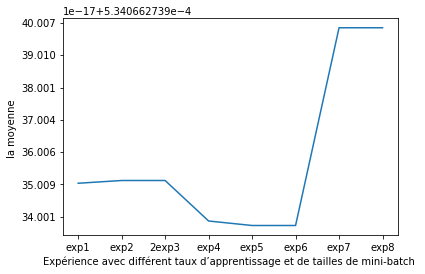

In [135]:
#la Moyenne
plt.plot(lr_min2,W_Mvr2)
#plt.title('la moyenne d un modèle appris sans régularisation' )
plt.ylabel('la moyenne ') 
plt.xlabel('Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')

Text(0.5,0,'Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')

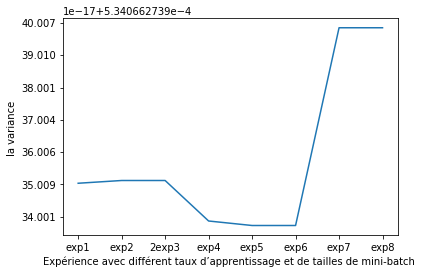

In [134]:
# la variance
plt.plot(lr_min2,W_Mvr2)
#plt.title('la variance d un modèle appris sans régularisation' )
plt.ylabel('la variance ') 
plt.xlabel('Expérience avec différent taux d’apprentissage et de tailles de mini-batch ')